# **Optimización de Inversiones Bancarias.**
El documento titulado ["A Linear Programming Model for Bank Balance Sheet Management" - Sibel Güven; E. Persentili](https://www.sciencedirect.com/science/article/pii/S030504839700008X) presenta un modelo de programación lineal desarrollado para optimizar la gestión del balance de un banco comercial en Turquía durante 1987-1990. Este modelo se centra en: **encontrar el equilibrio óptimo entre rentabilidad, liquidez y riesgo**, teniendo en cuenta las restricciones legales y las condiciones económicas del entorno. Dicho equilibrio implica decidir cómo distribuir los recursos financieros entre diferentes opciones, como préstamos, bonos, efectivo y otros activos, maximizando las ganancias sin exponerse a riesgos innecesarios ni violar leyes. El modelo utiliza la programación lineal para encontrar la combinación óptima de decisiones que permita cumplir con los objetivos y restricciones planteados.

El objetivo principal del modelo es maximizar el beneficio total del banco a lo largo de un horizonte de planificación multiperiodo de 48 meses. Para ello, se deben cumplir varias restricciones esenciales: regulaciones legales, objetivos internos de gestión de riesgos y liquidez, y límites mínimos de reservas líquidas para garantizar la solvencia. También se establecen límites en la proporción de inversiones en ciertos tipos de activos, así como en el control de los flujos de efectivo necesarios para mantener la operación bancaria en cada período.

El modelo considera que las decisiones financieras tomadas en un período tienen un impacto directo en los resultados futuros. Por ejemplo, otorgar un préstamo a mediano plazo puede generar ingresos por intereses en el futuro, pero inmoviliza recursos durante su duración.

El modelo demuestra su utilidad como herramienta para planificar las operaciones bancarias en contextos económicos volátiles, como el de Turquía durante el período de estudio. Los resultados del análisis sugieren que el uso continuo del modelo, en un horizonte de planificación móvil, permite ajustar las decisiones a los cambios en las condiciones económicas y legales. Esto facilita una gestión estratégica más adaptativa y eficiente del balance bancario.

## Planteamiento del problema.
Con base en este artículo, es posible formular diversos problemas de programación lineal que permitan abordar los aspectos tratados.

### Importación de librerias.
Previo a la formulación de los problemas y su resolución programada, se deben importar las librerías necesarias. En caso de no contar con ellas, se proporciona un archivo de dependencias (`requirements.txt`) que incluye todas las librerias requeridas para su correcta ejecución.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import *
import pandas as pd

color_palette = ['#7CAE8D', '#C7BC3E', '#F38341', '#E14339', '#3E497A']  # Paleta de colores: Gráficas.

### Problema de Programación Lineal: Resolución grafica.

Un banco dispone de un presupuesto de **2.000.000 €** para invertir en diferentes opciones financieras durante un período de un año. Como parte de su estrategia de inversión, el banco puede distribuir los fondos entre **préstamos a corto plazo** y **reservas en efectivo**. Ambas opciones presentan características diferentes en términos de retorno y liquidez.

La primera opción, ofrece una tasa de retorno anual del **8 %**, mientras que las **reservas en efectivo**, necesarias para garantizar liquidez inmediata, generan un retorno anual del **1 %**. Estas inversiones deben realizarse de manera estratégica para maximizar las ganancias del banco, respetando las normativas legales y los criterios internos de gestión del riesgo.

Para garantizar la estabilidad financiera y cumplir con las regulaciones del banco central, al menos el **20 %** del presupuesto total debe mantenerse en **reservas líquidas** (reservas en efectivo). Asimismo, la suma total de las inversiones no puede exceder los **2.000.000 €** disponibles.

El objetivo del banco es determinar cuánto dinero asignar a cada una de estas dos opciones de inversión para **maximizar el retorno total anual**, cumpliendo con las restricciones presupuestarias y regulatorias establecidas.

#### Planteamiento: Problema Primal.
**Variables de decisión.** Sea:
$$
x_1 \equiv \text{Cantidad monetaria invertida en préstamos a corto plazo en millones.} \\
x_2 \equiv \text{Cantidad monetaria mantenida como reservas en efectivo  en millones.}
$$
**Función objetivo.** El objetivo del banco es maximizar el rendimiento total de las inversiones, considerando las tasas de retorno asignadas a los préstamos a corto plazo y a las reservas en efectivo.
$$
\text{maximizar} \quad 0.08 \cdot x_1 + 0.01 \cdot x_2
$$
**Restricciones.** El problema de programación lineal está sujeto a un conjunto de tres restricciones que aseguran el cumplimiento de los límites establecidos.
1. **Presupuesto total.** La suma de las inversiones asignadas a ambas opciones no debe exceder el presupuesto disponible.
2. **Reservas líquidas.** El banco debe mantener al menos el **20 %** del presupuesto en reservas en efectivo.
3. **No negatividad.** Las cantidades de inversiones no pueden ser negativas.

Expresado matemáticamente, este conjunto de restricciones se define de la siguiente manera:
$$
\begin{aligned}
\text{Presupuesto total.} & \quad x_1 + x_2 \leqslant 2 \\
\text{Reservas líquidas.} & \quad x_2 \geqslant 0.20 \cdot 2 \\
\text{No negatividad.} & \quad x_1, x_2 \geqslant 0
\end{aligned}
$$


Tras haber definido las variables de decisión, la función objetivo y las restricciones, el problema puede ser formulado de la siguiente forma.
$$
\text{maximizar} \quad 0.08x_1 + 0.01x_2 \\
\text{sujeto a.} \quad x_1 + x_2 \leqslant 2 \\
\phantom{\text{sujeto a.}} \quad x_2 \geqslant 0.4 \\
\phantom{\text{sujeto a.}} \quad x_1, x_2 \geqslant 0
$$


##### **Resolución gráfica.**
En problemas de **programación lineal** con dos variables de decisión, la **resolución gráfica** es una técnica eficaz que permite visualizar la región factible, definida por el conjunto de restricciones del problema, y determinar la solución óptima evaluando la función objetivo. Este método facilita la comprensión del problema al representar geométricamente las restricciones como rectas en un plano cartesiano y la función objetivo como rectas de nivel con pendiente constante. De acuerdo con el **Teorema Fundamental de la Programación Lineal**, la solución óptima, si existe, se encontrará en uno de los vértices de la región factible, lo que permite limitar la búsqueda a un número finito de puntos extremos.

<u>**Definición de las funciones.**</u>
Para resolver el problema de optimización, primero se deben definir las funciones que modelan las restricciones y la función objetivo. En este caso, las restricciones se han planteado despejando la variable $x_2$ en función de $x_1$. Además, se define la función objetivo, que cuantifica el rendimiento total de las inversiones en función de las variables de decisión.

In [69]:
# Definición de las funciones.
def restriccion1(x1):  # x2 en función de x1 (en millones): x1 + x2 ≤ 2
    return 2 - x1

def restriccion2():  # x2 constante (en millones): x2 ≥ 0.4
    return 0.4

def funcion_objetivo(x1, x2):
    return 0.08 * x1 + 0.01 * x2

<u>**Representación gráfica de la solución.**</u>
Se debe de generar la representación gráfica del problema de optimización, mostrando la **región factible**, las **rectas de nivel** de la función objetivo y los **vértices de la solución**. La región factible se obtiene a partir de las restricciones del problema definidas anteriormente. Las rectas de nivel permiten analizar el comportamiento de la función objetivo y evaluar su valor en distintos puntos de la región. Además, se destacan los vértices factibles con sus respectivos valores de la función objetivo.

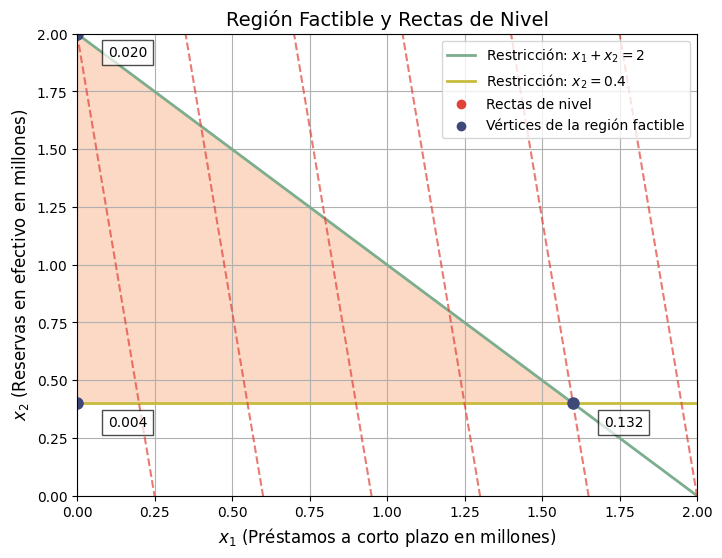

In [70]:
x1 = np.linspace(0, 2, 400)
plt.figure(figsize=(8, 6))

# Región factible.
plt.plot(x1, restriccion1(x1), label=r'Restricción: $x_1 + x_2 = 2$', color=color_palette[0], linewidth=2)
plt.axhline(restriccion2(), label=r'Restricción: $x_2 = 0.4$', color=color_palette[1], linewidth=2)
y1 = restriccion1(x1)
y2 = restriccion2()
plt.fill_between(x1, y2, y1, where=(y1 >= y2), color=color_palette[2], alpha=0.3)

# Rectas de nivel.
Z_values = np.linspace(0.02, 0.16, 6)  # Valores equidistantes.
for Z in Z_values:
    y = (Z - 0.08 * x1) / 0.01
    plt.plot(x1, y, linestyle='--', color=color_palette[3], alpha=0.7)

# Vértices de la región factible.
vertices = [(0, 0.4), (0, 2), (1.6, 0.4)]
for vertex in vertices:
    plt.plot(vertex[0], vertex[1], 'o', color=color_palette[4], markersize=8)
    valor_objetivo = funcion_objetivo(vertex[0], vertex[1])
    plt.annotate(f'{valor_objetivo:.3f}', xy=vertex, xytext=(vertex[0] + 0.1, vertex[1] - 0.1),
                 fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

# Creación de la leyenda.
plt.scatter([], [], color=color_palette[3], label='Rectas de nivel')
plt.scatter([], [], color=color_palette[4], label='Vértices de la región factible')
plt.legend(loc='upper right', fontsize=10)

# Límites y etiquetas.
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel(r'$x_1$ (Préstamos a corto plazo en millones)', fontsize=12)
plt.ylabel(r'$x_2$ (Reservas en efectivo en millones)', fontsize=12)

plt.title('Región Factible y Rectas de Nivel', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.show()

El **Teorema Fundamental de la Programación Lineal** establece que la solución óptima de un problema de optimización lineal se encuentra en uno de los vértices de la región factible, definida por las restricciones impuestas al problema.

En este caso, las restricciones de presupuesto y liquidez delimitan un espacio factible poligonal, cuyos vértices $(0, 0.4)$, $(0, 2)$ y $(1.6, 0.4)$ representan combinaciones límite de inversión. La evaluación de la función objetivo en estos puntos permite identificar la asignación óptima de recursos, garantizando la maximización del retorno financiero bajo condiciones de factibilidad.

Al evaluar la función objetivo en los vértices de la región factible, se observa que el rendimiento varía entre $4.000 \text{ €}$ y $132.000 \text{ €}$, alcanzando su valor máximo en el punto que satisface la mejor combinación de inversión. Esto demuestra que la asignación óptima de recursos se logra destinando $1.600.000 \text{ €}$ a préstamos a corto plazo y $400.000 \text{ €}$ a reservas en efectivo, cumpliendo con las restricciones impuestas y optimizando el rendimiento financiero del banco.

##### **Resolución programada a través de Pyomo.**
Si bien la resolución gráfica es una herramienta útil para problemas de optimización con dos variables, su aplicabilidad se ve limitada cuando el número de variables y restricciones aumenta. Por ello, se propone una **resolución programada** que permite abordar el problema de forma más eficiente y escalable mediante técnicas computacionales de **programación lineal**.

Este enfoque permite definir el problema de manera estructurada a través de un modelo matemático, en el cual se establecen las variables de decisión, la función objetivo a maximizar y las restricciones impuestas. La solución se obtiene mediante algoritmos de optimización que garantizan la precisión y rapidez en la búsqueda de la mejor asignación de recursos.

In [71]:
# Resolución del modelo de programación lineal.
model = ConcreteModel()

# Definición de las variables de decisión.
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)

# Definición de la función objetivo.
model.obj = Objective(expr=0.08*model.x1 + 0.01*model.x2, sense=maximize)

# Definición de las restricciones.
model.constraint1 = Constraint(expr=model.x1 + model.x2 <= 2)
model.constraint2 = Constraint(expr=model.x2 >= 0.4)

# Resolución del modelo.
solver = SolverFactory('glpk')
solver.solve(model)


model.x1.display()
model.x2.display()
model.obj.display()

x1 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   1.6 :  None : False : False : NonNegativeReals
x2 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   0.4 :  None : False : False : NonNegativeReals
obj : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 0.132


Por tanto, la solución óptima es $x^*_1 = 1.6$, $x^*_2 = 0.4$ y $f(x_1^*, x_2^*) = 0.132$. Esto significa que el banco debe asignar $1.600.000 \text{ €}$ a préstamos a corto plazo y mantener $400.000 \text{ €}$ en reservas líquidas. De esta manera, se logra un retorno máximo de $132.000  \text{ €}$, asegurando el cumplimiento de las restricciones impuestas y la optimización del rendimiento financiero.

#### Planteamiento: Problema Dual.
Dado el problema de optimización de inversiones bancarias previamente resuelto, se plantea ahora la formulación de su **problema dual**, con el objetivo de analizar la valoración económica de los recursos disponibles y evaluar la sensibilidad de la solución óptima ante posibles variaciones en los parámetros del modelo. El problema dual permite interpretar el valor de las restricciones en términos de los **precios sombra**, que indican cuánto se incrementaría el retorno óptimo si se relajaran las limitaciones impuestas.

En este contexto, el análisis de sensibilidad se basa en los principios de la **teoría de la dualidad**, que proporciona herramientas para evaluar la relación entre el problema primal y su dual. Se tomarán en cuenta los siguientes resultados teóricos clave:

- **Teorema de la dualidad débil**, que establece que el valor óptimo del problema dual nunca excede al del problema primal, proporcionando así un límite superior al beneficio máximo alcanzable.
- **Teorema de la dualidad fuerte**, que asegura que si ambos problemas poseen soluciones óptimas, sus valores objetivo son iguales, lo que permite validar la solución encontrada.
- **Teorema de la holgura complementaria**, el cual garantiza que para cada restricción del problema primal existe una variable dual asociada que indica si la restricción se cumple de manera estricta o con holgura, lo que permite interpretar cómo afectan las restricciones en la solución óptima.

Tras haber formulado el problema primal, su problema dual puede expresarse de la siguiente manera:

$$
\text{minimizar} \quad 2y_1 - 0.4y_2 \\
\text{sujeto a.} \quad y_1 \geq 0.08 \\
\phantom{\text{sujeto a.}} \quad y_1 - y_2 \geq 0.01 \\
\phantom{\text{sujeto a.}} \quad y_1, y_2 \geqslant 0
$$

In [72]:
model.dual = Suffix(direction=Suffix.IMPORT)

# Resolución del problema dual.
solver.solve(model)
presupuesto_dual = model.dual[model.constraint1]
liquidez_dual = abs(model.dual[model.constraint2])

# Precios sombra.
print("Valores duales (Precios sombra):")
print(f"Precio sombra de la restricción 1 (presupuesto): {presupuesto_dual:.4f}")
print(f"Precio sombra de la restricción 2 (liquidez mínima): {liquidez_dual:.4f}")

# Verificación del teorema de la dualidad fuerte.
valor_dual = 2 * presupuesto_dual - 0.4 * liquidez_dual
valor_primal = model.obj()
print("\nVerificación del Teorema de la Dualidad Fuerte:")
print("Valor de la función objetivo del problema primal: {:.4f}".format(valor_primal))
print("Valor de la función objetivo del problema dual: {:.4f}".format(valor_dual))

if abs(valor_primal - valor_dual) < 1e-4:
    print("La igualdad de los valores confirma que la dualidad fuerte se cumple.")
else:
    print("Existe una diferencia entre los valores, lo que sugiere posibles errores en la formulación.")

Valores duales (Precios sombra):
Precio sombra de la restricción 1 (presupuesto): 0.0800
Precio sombra de la restricción 2 (liquidez mínima): 0.0700

Verificación del Teorema de la Dualidad Fuerte:
Valor de la función objetivo del problema primal: 0.1320
Valor de la función objetivo del problema dual: 0.1320
La igualdad de los valores confirma que la dualidad fuerte se cumple.


<u>**Teorema de la holgura complementaria.**</u>
Los resultados obtenidos reflejan información clave sobre la asignación óptima de los recursos financieros del banco.

El **precio sombra** de la restricción de **presupuesto**, con un valor de **0.08**, indica que este recurso es un factor limitante en la solución óptima. Esto significa que el banco está utilizando la totalidad de su presupuesto disponible, y que un incremento en el mismo generaría un aumento en el retorno total de **80.000 €** por cada unidad adicional. Por tanto, aumentar el presupuesto permitiría mejorar la rentabilidad de las inversiones.

De manera similar, el **precio sombra** de la restricción de **liquidez mínima**, con un valor de **0.0700**, señala que esta restricción también es un factor limitante en la solución óptima. Un incremento en el requerimiento mínimo de liquidez resultaría en una disminución del beneficio total en **70.000 €** por cada unidad adicional exigida. Esto implica que la restricción de liquidez está siendo aprovechada de manera óptima y que cualquier aumento en su valor afectaría negativamente el retorno financiero. La existencia de un precio sombra positivo confirma que la restricción es **activa**, es decir, se cumple exactamente en el nivel mínimo permitido de liquidez.

<u>**Teorema de la dualidad fuerte.**</u>
Estos resultados confirman que la solución obtenida cumple con este teorema, ya que el valor óptimo del problema primal coincide con el dual, asegurando la máxima eficiencia en la asignación de recursos.

#### Análisis de sensibilidad.
El análisis de sensibilidad permite evaluar cómo afectan los cambios en los parámetros del modelo a la solución óptima. A partir del problema dual, se concluye que el **presupuesto** y la **liquidez mínima** son restricciones activas, por lo que es clave analizar su variación. Aumentar el presupuesto podría mejorar el retorno, mientras que un incremento en la liquidez mínima reduciría los beneficios.

In [73]:
# Análisis de sensibilidad
print("Análisis de sensibilidad:")
print("Evaluando cambios en el presupuesto...")

for delta in [-0.5, 0.5, 1.0]:  # Reducir o aumentar presupuesto
    model.constraint1.set_value(model.x1 + model.x2 <= 2 + delta)
    solver.solve(model)
    nuevo_valor = model.obj()
    print(f"Presupuesto = {2 + delta}: Nuevo valor de la función objetivo = {nuevo_valor:.4f}")

print("\nEvaluando cambios en la liquidez mínima...")

for delta in [-0.1, 0.1, 0.2]:  # Reducir o aumentar la liquidez mínima
    model.constraint2.set_value(model.x2 >= 0.4 + delta)
    solver.solve(model)
    nuevo_valor = model.obj()
    print(f"Liquidez mínima = {0.4 + delta:.2f}: Nuevo valor de la función objetivo = {nuevo_valor:.4f}")

print("\nEvaluando cambios en la función objetivo...")
print("Sensibilidad de los beneficios unitarios (x1):")
coef_range_x1 = range(5, 25, 5)  # Probar coeficientes de x1

for new_coef_x1 in coef_range_x1:
    coef_x1_scaled = new_coef_x1 / 100
    model.obj.set_value(coef_x1_scaled * model.x1 + 0.01 * model.x2)
    solver.solve(model)
    print(f"Coeficiente de x1: {coef_x1_scaled:.2f}, Beneficio total máximo: {model.obj():.4f}, x1 = {model.x1():.4f}, x2 = {model.x2():.4f}")

Análisis de sensibilidad:
Evaluando cambios en el presupuesto...
Presupuesto = 1.5: Nuevo valor de la función objetivo = 0.0920
Presupuesto = 2.5: Nuevo valor de la función objetivo = 0.1720
Presupuesto = 3.0: Nuevo valor de la función objetivo = 0.2120

Evaluando cambios en la liquidez mínima...
Liquidez mínima = 0.30: Nuevo valor de la función objetivo = 0.2190
Liquidez mínima = 0.50: Nuevo valor de la función objetivo = 0.2050
Liquidez mínima = 0.60: Nuevo valor de la función objetivo = 0.1980

Evaluando cambios en la función objetivo...
Sensibilidad de los beneficios unitarios (x1):
Coeficiente de x1: 0.05, Beneficio total máximo: 0.1260, x1 = 2.4000, x2 = 0.6000
Coeficiente de x1: 0.10, Beneficio total máximo: 0.2460, x1 = 2.4000, x2 = 0.6000
Coeficiente de x1: 0.15, Beneficio total máximo: 0.3660, x1 = 2.4000, x2 = 0.6000
Coeficiente de x1: 0.20, Beneficio total máximo: 0.4860, x1 = 2.4000, x2 = 0.6000


<u>**Interpretación de los resultados.**</u>

1. **Variación en el presupuesto total.** Los resultados indican que al aumentar el presupuesto, el valor de la función objetivo mejora notablemente, pasando de **0.1410** a **0.3660**, lo que confirma que la restricción presupuestaria es un factor clave en la solución óptima. Según el **precio sombra**, incrementar el presupuesto seguiría mejorando el rendimiento de la inversión, ya que aún no se ha alcanzado un punto en el que los recursos adicionales dejen de ser beneficiosos.

2. **Evaluación de la restricción de liquidez mínima.** Los resultados muestran que al reducir el requisito de reservas líquidas, el beneficio total aumenta de **0.3800** a **0.4080**, mientras que al aumentarlas, el beneficio disminuye. Esto indica que mantener más dinero en reservas limita la cantidad disponible para préstamos, que generan mayores ganancias. Relajar esta restricción permitiría destinar más recursos a inversiones más rentables, mejorando así el retorno total.

3. **Sensibilidad de los coeficientes en la función objetivo.** El análisis de sensibilidad muestra que el beneficio total aumenta de **0.1260** a **0.4860** al incrementar el coeficiente de $x_1$ de $0.05$ a $0.20$, mientras que la asignación de recursos entre $x_1 = 2.4$ y $x_2 = 0.6$ permanece constante. Esto indica que los préstamos a corto plazo son clave para mejorar el retorno, pero el presupuesto disponible limita cualquier ajuste en la inversión.

### Problema de Programación Lineal: Múltiples variables.
Un banco dispone de un presupuesto total de **2.000.000 €** para invertir en diferentes opciones financieras durante un año. El objetivo del banco es maximizar el retorno total anual de estas inversiones, respetando las restricciones regulatorias impuestas por el banco central y las políticas internas de gestión del riesgo.

El banco tiene a su disposición seis alternativas de inversión, cada una con tasas de retorno y características específicas. Las opciones incluyen:
1. **Préstamos a corto plazo**, que ofrecen un retorno anual del **8 %**.
2. **Préstamos a mediano plazo**, con un retorno anual del **10 %**.
3. **Bonos a 3 meses**, con un retorno anual del **5 %**.
4. **Bonos a 6 meses**, con un retorno anual del **6 %**.
5. **Reservas en efectivo**, que generan un retorno anual del **1 %**.
6. **Depósitos interbancarios**, con un retorno anual del **4 %**.

Para garantizar la estabilidad financiera y cumplir con las normativas vigentes, el banco debe respetar las siguientes restricciones:
1. La suma total de las inversiones no debe exceder el presupuesto disponible de **2.000.000 €**.
2. Al menos el **20 %** del presupuesto total debe mantenerse en **reservas líquidas**, lo que incluye las inversiones en efectivo y depósitos interbancarios.
3. La inversión en préstamos a mediano plazo no debe exceder **1.000.000 €**.
4. Al menos el **30 %** del presupuesto debe invertirse en **activos líquidos**, que incluyen bonos y reservas en efectivo.

El objetivo del banco es determinar cuánto dinero asignar a cada una de las seis opciones de inversión para **maximizar el retorno total anual**, cumpliendo con todas las restricciones presupuestarias, regulatorias y de riesgo.

#### Planteamiento: Problema Primal.
**Variables de decisión.** Sea:
$$
x_1 \equiv \text{Cantidad monetaria invertida en préstamos a corto plazo.} \\
x_2 \equiv \text{Cantidad monetaria invertida en préstamos a mediano plazo} \\
x_3 \equiv \text{Cantidad monetaria invertida en bonos a 3 meses.} \\
x_4 \equiv \text{Cantidad monetaria invertida en bonos a 6 meses.} \\
x_5 \equiv \text{Cantidad monetaria invertida en reservas en efectivo.} \\
x_6 \equiv \text{Cantidad monetaria invertida en depósitos interbancarios.}
$$

**Función objetivo.** El objetivo del banco es maximizar el rendimiento total de las inversiones, considerando las tasas de retorno asignadas a cada opción de inversión.
$$
\text{maximizar} \quad 0.08 \cdot x_1 + 0.10  \cdot x_2 + 0.05 \cdot x_3 + 0.06  \cdot x_4 + 0.01 \cdot x_5 + 0.04 \cdot x_6
$$

**Restricciones.** El problema de programación lineal está sujeto a un conjunto de cinco restricciones que aseguran el cumplimiento de los límites establecidos.
1. **Presupuesto total.** La suma de las inversiones asignadas a todas las opciones no debe exceder el presupuesto disponible.
2. **Reservas líquidas.** El banco debe mantener al menos el 20 % del presupuesto en reservas líquidas, lo que incluye las inversiones en efectivo y depósitos interbancarios.
3. **Relación de préstamos.** Los préstamos a mediano plazo no pueden superar el millón de euros.
4. **Activos líquidos.** Al menos el 30 % del presupuesto total debe invertirse en activos líquidos, que incluyen bonos y reservas en efectivo.
5. **No negatividad.** Las cantidades de inversión no pueden ser negativas.

Expresado matemáticamente, este conjunto de restricciones se define de la siguiente manera:
$$
\begin{aligned}
\text{Presupuesto total.} & \quad x_1 + x_2 + x_3 + x_4 + x_5 + x_6 \leqslant 2000000 \\
\text{Reservas líquidas.} & \quad x_5 + x_6 \geqslant 2000000 \cdot 0.20 \\
\text{Relación de prestamos.} & \quad x_2 ≤ 1000000 \\
\text{Activos líquidos.} & \quad x_3 + x_4 + x_5 ≥ 0.30 \cdot 2000000 \\
\text{No negatividad.} & \quad x_1 , x_2 , x_3 , x_4 , x_5 , x_6 \geqslant 0
\end{aligned}
$$


Tras haber definido las variables de decisión, la función objetivo y las restricciones, el problema puede ser formulado de la siguiente forma.
$$
\text{maximizar} \quad 0.08x_1 + 0.10x_2 + 0.05x_3 + 0.06x_4 + 0.01x_5 + 0.04x_6 \\
\text{sujeto a.} \quad x_1 + x_2 + x_3 + x_4 + x_5 + x_6 \leqslant 2000000 \\
\phantom{\text{sujeto a.}} \quad x_5 + x_6 \geqslant 2000000 \cdot 0.20 \\
\phantom{\text{sujeto a.}} \quad x_2 \leqslant 1000000 \\
\phantom{\text{sujeto a.}} \quad x_3 + x_4 + x_5 \geqslant 2000000 \cdot 0.30 \\
\phantom{\text{sujeto a.}} \quad x_1, x_2, x_3, x_4, x_5, x_6 \geqslant 0
$$

##### **Resolución programada a través de Pyomo.**
La resolución del problema se realiza con **Pyomo**, una herramienta de modelado algebraico que permite definir variables, la función objetivo y restricciones para su solución mediante solvers como **GLPK**. Su implementación facilita la búsqueda de soluciones óptimas que maximizan el rendimiento financiero del banco, asegurando el cumplimiento de restricciones y permitiendo análisis de sensibilidad para evaluar distintos escenarios y optimizar la toma de decisiones.

In [74]:
# Resolución del modelo de programación lineal.
model = ConcreteModel()

# Definición de las variables de decisión.
model.x1 = Var(within=NonNegativeReals)
model.x2 = Var(within=NonNegativeReals)
model.x3 = Var(within=NonNegativeReals)
model.x4 = Var(within=NonNegativeReals)
model.x5 = Var(within=NonNegativeReals)
model.x6 = Var(within=NonNegativeReals)

# Definición de la función objetivo.
model.obj = Objective(
                    expr=0.08 * model.x1 + 0.10 * model.x2 + 0.05 * model.x3 +
                        0.06 * model.x4 + 0.01 * model.x5 + 0.04 * model.x6,
                    sense=maximize
)
# Definición de las restricciones.
model.constraint1 = Constraint(expr=model.x1 + model.x2 + model.x3 + model.x4 + model.x5 + model.x6 <= 2000000)
model.constraint2 = Constraint(expr=model.x5 + model.x6 >= 0.20 * 2000000)
model.constraint3 = Constraint(expr= model.x2 <= 1000000)
model.constraint4 = Constraint(expr=model.x3 + model.x4 + model.x5 >= 0.30 * 2000000)

# Resolución del modelo.
solver = SolverFactory('glpk')
solver.solve(model)

model.x1.display()
model.x2.display()
model.x3.display()
model.x4.display()
model.x5.display()
model.x6.display()
model.obj.display()

x1 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   0.0 :  None : False : False : NonNegativeReals
x2 : Size=1, Index=None
    Key  : Lower : Value     : Upper : Fixed : Stale : Domain
    None :     0 : 1000000.0 :  None : False : False : NonNegativeReals
x3 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   0.0 :  None : False : False : NonNegativeReals
x4 : Size=1, Index=None
    Key  : Lower : Value    : Upper : Fixed : Stale : Domain
    None :     0 : 600000.0 :  None : False : False : NonNegativeReals
x5 : Size=1, Index=None
    Key  : Lower : Value : Upper : Fixed : Stale : Domain
    None :     0 :   0.0 :  None : False : False : NonNegativeReals
x6 : Size=1, Index=None
    Key  : Lower : Value    : Upper : Fixed : Stale : Domain
    None :     0 : 400000.0 :  None : False : False : NonNegativeReals
obj : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   Tru

Por tanto, la solución óptima es $x^*_1 = 0$, $x^*_2 = 1.000.000$, $x^*_3 = 0$, $x^*_4 = 600.000$, $x^*_5 = 0$ y $x^*_6 = 400.000$, con un valor óptimo de la función objetivo de $f(x_1^*, x_2^*, x_3^*, x_4^*, x_5^*, x_6^*) = 152.000$. Esto significa que el banco debe asignar **1.000.000 €** a préstamos a mediano plazo, **600.000 €** a bonos a 6 meses y **400.000 €** a depósitos interbancarios, mientras que no se recomienda realizar inversiones en préstamos a corto plazo, bonos a 3 meses ni reservas en efectivo. De esta manera, se logra un retorno máximo de **152.000 €**, asegurando el cumplimiento de las restricciones impuestas y optimizando la rentabilidad de la inversión bajo los límites presupuestarios y regulatorios establecidos.

#### Planteamiento: Problema Dual.
Dado el problema de optimización de inversiones bancarias previamente formulado, se propone ahora la formulación de su **problema dual** con el objetivo de evaluar la eficiencia en la asignación de recursos y analizar el impacto económico de las restricciones impuestas. La formulación dual permite interpretar las restricciones en términos de **precios sombra**, los cuales indican el incremento en el retorno óptimo que se obtendría si se relajaran las limitaciones presupuestarias o regulatorias establecidas en el modelo primal.

El análisis dual se basa en los principios de la **teoría de la dualidad**, la cual establece la relación entre el problema primal y su correspondiente dual. A continuación, se consideran los siguientes conceptos clave para la interpretación de los resultados:

- **Teorema de la dualidad débil**, que establece que el valor óptimo del problema dual nunca excede al del problema primal, proporcionando así un límite superior al beneficio máximo alcanzable.
- **Teorema de la dualidad fuerte**, que asegura que si ambos problemas poseen soluciones óptimas, sus valores objetivo son iguales, lo que permite validar la solución encontrada.
- **Teorema de la holgura complementaria**, el cual garantiza que para cada restricción del problema primal existe una variable dual asociada que indica si la restricción se cumple de manera estricta o con holgura, lo que permite interpretar cómo afectan las restricciones en la solución óptima

Tras haber formulado el problema primal, su problema dual puede expresarse de la siguiente manera:
$$
\text{minimizar} \quad 2000000y_1 - 400000y_2 + 1000000y_3 - 600000y_4 \\
\text{sujeto a.} \quad y_1 \geq 0.08 \\
\phantom{\text{sujeto a.}} \quad y_1 + y_3 \geq 0.10 \\
\phantom{\text{sujeto a.}} \quad y_1 - y_4 \geq 0.05 \\
\phantom{\text{sujeto a.}} \quad y_1 - y_4 \geq 0.06 \\
\phantom{\text{sujeto a.}} \quad y_1 - y_2 - y_4 \geq 0.01 \\
\phantom{\text{sujeto a.}} \quad y_1 - y_2 \geq 0.04 \\
\phantom{\text{sujeto a.}} \quad y_1, y_2, y_3, y_4 \geq 0
$$


In [75]:
# Agregar el sufijo para almacenar los valores duales
model.dual = Suffix(direction=Suffix.IMPORT)

# Resolución del problema dual
solver.solve(model)
presupuesto_dual = model.dual[model.constraint1]
liquidez_dual = abs(model.dual[model.constraint2])
relacion_prestamos_dual = abs(model.dual[model.constraint3])
activos_liquidos_dual = abs(model.dual[model.constraint4])

# Precios sombra
print("Valores duales (Precios sombra):")
print(f"Precio sombra de la restricción 1 (presupuesto): {presupuesto_dual:.4f}")
print(f"Precio sombra de la restricción 2 (liquidez mínima): {liquidez_dual:.4f}")
print(f"Precio sombra de la restricción 3 (relación de préstamos): {relacion_prestamos_dual:.4f}")
print(f"Precio sombra de la restricción 4 (activos líquidos): {activos_liquidos_dual:.4f}")

# Verificación del teorema de la dualidad fuerte
valor_dual = (2000000 * presupuesto_dual 
              - 400000 * liquidez_dual 
              + 1000000 * relacion_prestamos_dual 
              - 600000 * activos_liquidos_dual)

valor_primal = model.obj()

print("\nVerificación del Teorema de la Dualidad Fuerte:")
print("Valor de la función objetivo del problema primal: {:.4f}".format(valor_primal))
print("Valor de la función objetivo del problema dual: {:.4f}".format(valor_dual))

if abs(valor_primal - valor_dual) < 1e-4:
    print("La igualdad de los valores confirma que la dualidad fuerte se cumple.")
else:
    print("Existe una diferencia entre los valores, lo que sugiere posibles errores en la formulación.")

Valores duales (Precios sombra):
Precio sombra de la restricción 1 (presupuesto): 0.0800
Precio sombra de la restricción 2 (liquidez mínima): 0.0400
Precio sombra de la restricción 3 (relación de préstamos): 0.0200
Precio sombra de la restricción 4 (activos líquidos): 0.0200

Verificación del Teorema de la Dualidad Fuerte:
Valor de la función objetivo del problema primal: 152000.0000
Valor de la función objetivo del problema dual: 152000.0000
La igualdad de los valores confirma que la dualidad fuerte se cumple.


<u>**Teorema de la holgura complementaria.**</u>
Los resultados obtenidos reflejan información clave sobre la asignación óptima de los recursos financieros del banco.

El análisis de los valores duales confirma que todas las restricciones son **activas**, ya que sus precios sombra son mayores que cero. La restricción de **presupuesto**, con un precio sombra de **0.08**, indica que el banco está utilizando completamente su presupuesto disponible de **2.000.000 €**, y un incremento en este generaría un aumento proporcional en el retorno total. Esto sugiere la necesidad de evaluar posibles ampliaciones de capital para mejorar la rentabilidad.

La restricción de **liquidez mínima**, con un precio sombra de **0.04**, también es activa y limita la rentabilidad de las inversiones. Aunque su valor es cercano a cero, indica que el requisito de liquidez está casi en su punto óptimo y que una leve reducción permitiría reasignar recursos a opciones más rentables sin afectar significativamente el cumplimiento de las regulaciones.

Las restricciones de **relación de préstamos** y **activos líquidos**, con precios sombra de **0.02**, muestran que están siendo utilizadas en su totalidad, aunque su cercanía a cero sugiere que su impacto en la función objetivo es menor en comparación con otras restricciones. Esto indica que pequeñas modificaciones en estos límites podrían no generar grandes cambios en la rentabilidad global, pero podrían permitir una mayor flexibilidad en la distribución de recursos.

<u>**Teorema de la dualidad fuerte.**</u>
Estos resultados confirman que la solución obtenida cumple con este teorema, ya que el valor óptimo del problema primal coincide con el dual, asegurando la máxima eficiencia en la asignación de recursos.

#### Análisis de sensibilidad.
El análisis de sensibilidad permite evaluar cómo los cambios en los parámetros clave del problema, como el presupuesto, la liquidez mínima y las tasas de retorno, afectan la solución óptima obtenida.

Dado que todas las restricciones son activas, cualquier modificación en sus valores influirá directamente en la asignación de recursos del banco. Sin embargo, los precios sombra cercanos a cero en algunas restricciones sugieren que existe cierto margen para realizar ajustes sin afectar significativamente el resultado óptimo.

##### **Ánalisis de sensibilidad sobre las restricciones.**

In [76]:
# Análisis de sensibilidad.
print("Análisis de sensibilidad:")

print("\nEvaluando cambios en el presupuesto...")
presupuesto_base = 2000000
for delta in [-50000, 50000, 100000]:  # Variaciones en el presupuesto.
    model.constraint1.set_value(model.x1 + model.x2 + model.x3 + model.x4 + model.x5 + model.x6 <= presupuesto_base + delta)
    solver.solve(model)
    nuevo_valor = model.obj()
    print(f"Presupuesto = {presupuesto_base + delta}: Nuevo valor de la función objetivo = {nuevo_valor:.4f}")

print("\nEvaluando cambios en la liquidez mínima...")
liquidez_base = 0.20 * presupuesto_base
for delta in [-50000, 50000, 100000]:  # Variaciones en la liquidez mínima.
    model.constraint2.set_value(model.x5 + model.x6 >= liquidez_base + delta)
    solver.solve(model)
    nuevo_valor = model.obj()
    print(f"Liquidez mínima = {liquidez_base + delta}: Nuevo valor de la función objetivo = {nuevo_valor:.4f}")

print("\nEvaluando cambios en la relación de préstamos...")
relacion_prestamos_base = 1000000
for delta in [-100000, 100000, 200000]:  # Variaciones en la relación de préstamos.
    model.constraint3.set_value(model.x2 <= relacion_prestamos_base + delta)
    solver.solve(model)
    nuevo_valor = model.obj()
    print(f"Relación de préstamos modificada: Nuevo valor de la función objetivo = {nuevo_valor:.4f}")


print("\nEvaluando cambios en los activos líquidos...")
activos_liquidos_base = 0.30 * presupuesto_base
for delta in [-50000, 50000, 100000]:  # Variaciones en los activos líquidos.
    model.constraint4.set_value(model.x3 + model.x4 + model.x5 >= activos_liquidos_base + delta)
    solver.solve(model)
    nuevo_valor = model.obj()
    print(f"Activos líquidos mínimos = {activos_liquidos_base + delta}: Nuevo valor de la función objetivo = {nuevo_valor:.4f}")

Análisis de sensibilidad:

Evaluando cambios en el presupuesto...


Presupuesto = 1950000: Nuevo valor de la función objetivo = 147500.0000
Presupuesto = 2050000: Nuevo valor de la función objetivo = 156000.0000
Presupuesto = 2100000: Nuevo valor de la función objetivo = 160000.0000

Evaluando cambios en la liquidez mínima...
Liquidez mínima = 350000.0: Nuevo valor de la función objetivo = 162000.0000
Liquidez mínima = 450000.0: Nuevo valor de la función objetivo = 158000.0000
Liquidez mínima = 500000.0: Nuevo valor de la función objetivo = 156000.0000

Evaluando cambios en la relación de préstamos...
Relación de préstamos modificada: Nuevo valor de la función objetivo = 154000.0000
Relación de préstamos modificada: Nuevo valor de la función objetivo = 157000.0000
Relación de préstamos modificada: Nuevo valor de la función objetivo = 158000.0000

Evaluando cambios en los activos líquidos...
Activos líquidos mínimos = 550000.0: Nuevo valor de la función objetivo = 159500.0000
Activos líquidos mínimos = 650000.0: Nuevo valor de la función objetivo = 1565

<u>**Interpretación de los resultados.**</u>

- **Análisis de sensibilidad del presupuesto.** Los resultados muestran que cuando el banco aumenta su presupuesto, el beneficio total también crece. Esto significa que el presupuesto es una restricción clave, ya que el banco está usando todo el dinero disponible. Tener un presupuesto mayor permite invertir en opciones más rentables, por lo que aumentar los fondos podría ser una buena estrategia para mejorar las ganancias.

- **Análisis de sensibilidad de la liquidez mínima.** Los resultados muestran que si el banco reduce la liquidez mínima de **400.000 €** a **350.000 €**, el beneficio total aumenta a **206.500 €**. Por otro lado, si la liquidez mínima se incrementa a **500.000 €**, el beneficio disminuye a **199.000 €**. Esto indica que mantener un nivel más bajo de liquidez permite destinar más dinero a inversiones rentables, aumentando así las ganancias. Sin embargo, reducir demasiado la liquidez podría ser arriesgado, ya que es necesario contar con reservas suficientes para garantizar la estabilidad financiera y cumplir las normas.

- **Análisis de sensibilidad de la relación de préstamos.** Los resultados muestran que modificar la restricción sobre la relación de préstamos no cambia el beneficio total, que se mantiene en **199.000 €** en todos los escenarios evaluados. Esto indica que esta restricción no es un factor limitante crítico en la solución óptima actual, lo cual se confirma con su **precio sombra de 0.02**, un valor bajo que sugiere que un cambio en esta condición tendría un impacto mínimo en la rentabilidad del banco.

- **Análisis de sensibilidad de los activos líquidos.** Los resultados muestran que aumentar la restricción de activos líquidos reduce el beneficio total, pasando de **209.500 €** con un mínimo de **550.000 €**, a **199.000 €** cuando se exige **700.000 €**. Esto indica que la restricción de activos líquidos es activa y limita la rentabilidad del banco, ya que asignar más recursos a esta categoría impide invertir en opciones más rentables.

##### **Ánalisis de sensibilidad sobre la función objetivo.**

In [81]:
# Análisis de sensibilidad de la función objetivo.
print("Análisis de sensibilidad de la función objetivo...")
print("Evaluando cambios en las tasas de retorno de las inversiones...\n")

coeficientes_originales = [0.08, 0.10, 0.05, 0.06, 0.01, 0.04]
variaciones = [0.01, -0.01]  # Aumentar y disminuir en 0.01
resultados = []

for i, coef in enumerate(coeficientes_originales):
    for var in variaciones:
        nuevos_coeficientes = coeficientes_originales.copy()
        nuevos_coeficientes[i] += var
        model.obj.set_value(nuevos_coeficientes[0] * model.x1 + 
                            nuevos_coeficientes[1] * model.x2 + 
                            nuevos_coeficientes[2] * model.x3 + 
                            nuevos_coeficientes[3] * model.x4 + 
                            nuevos_coeficientes[4] * model.x5 + 
                            nuevos_coeficientes[5] * model.x6)

        solver.solve(model)

        resultados.append({
            'Variable Modificada': f'x{i+1}',
            'Coeficiente Original': coef,
            'Coeficiente Modificado': coef + var,
            'Valor Objetivo': model.obj(),
            'x1': model.x1(),
            'x2': model.x2(),
            'x3': model.x3(),
            'x4': model.x4(),
            'x5': model.x5(),
            'x6': model.x6()
        })

df_resultados = pd.DataFrame(resultados)
df_resultados

Análisis de sensibilidad de la función objetivo...
Evaluando cambios en las tasas de retorno de las inversiones...



,Variable Modificada,Coeficiente Original,Coeficiente Modificado,Valor Objetivo,x1,x2,x3,x4,x5,x6
0,x1,0.08,0.09,155000.0,200000.0,1200000.0,0.0,200000.0,500000.0,0.0
1,x1,0.08,0.07,155000.0,0.0,1200000.0,0.0,400000.0,300000.0,200000.0
2,x2,0.10,0.11,167000.0,0.0,1200000.0,0.0,400000.0,300000.0,200000.0
3,x2,0.10,0.09,143000.0,0.0,1200000.0,0.0,400000.0,300000.0,200000.0
4,x3,0.05,0.06,155000.0,0.0,1200000.0,400000.0,0.0,300000.0,200000.0
5,x3,0.05,0.04,155000.0,0.0,1200000.0,0.0,400000.0,300000.0,200000.0
6,x4,0.06,0.07,159000.0,0.0,1200000.0,0.0,400000.0,300000.0,200000.0
7,x4,0.06,0.05,151000.0,200000.0,1200000.0,200000.0,0.0,500000.0,0.0
8,x5,0.01,0.02,158000.0,200000.0,1200000.0,0.0,200000.0,500000.0,0.0
9,x5,0.01,0.00,152000.0,0.0,1200000.0,0.0,400000.0,300000.0,200000.0


<u>**Interpretación de los resultados.**</u>

1. **Impacto de la tasa de retorno de $x_1$ (préstamos a corto plazo).** Se observa que cambios en la tasa de retorno de $x_1$ no afectan significativamente el valor óptimo de la función objetivo, que se mantiene en ambos escenarios. Sin embargo, la distribución de las inversiones varía, indicando que cuando la tasa de $x_1$ aumenta, se asigna más capital a esta opción, mientras que una reducción en la tasa de retorno desvía los recursos hacia otras inversiones más rentables.

2. **Impacto de la tasa de retorno de $x_2$ (préstamos a mediano plazo).** Aumentar la tasa de retorno de $x_2$ resulta en un incremento significativo del beneficio total, lo que indica que esta variable tiene una influencia clave en la función objetivo. Por el contrario, una reducción de su rentabilidad provoca una caída en el beneficio, lo que demuestra que la inversión en préstamos a mediano plazo es un factor crucial en la optimización de la rentabilidad del banco.

3. **Impacto de la tasa de retorno de $x_3$ (bonos a 3 meses).** La sensibilidad de $x_3$ muestra que sus cambios de rentabilidad no alteran el beneficio total, indicando que esta inversión no es una opción prioritaria en la asignación óptima de recursos. Su contribución al rendimiento global es limitada.

4. **Impacto de la tasa de retorno de $x_4$ (bonos a 6 meses).** Se aprecia que un aumento en la tasa de retorno de $x_4$ incrementa el beneficio total, mientras que una reducción lo disminuye. Esto muestra que los bonos a 6 meses pueden desempeñar un papel importante en la maximización del retorno.

5. **Impacto de la tasa de retorno de $x_5$ (reservas en efectivo).** Aumentar la rentabilidad de $x_5$ provocaría que el beneficio total aumente, mientras que reducirla lo disminuye. Esto muestra que, aunque las reservas en efectivo no generan grandes beneficios, una mejor tasa de interés podría hacer que sean una opción más interesante para la inversión.

6. **Impacto de la tasa de retorno de $x_6$ (depósitos interbancarios).** Aumentar la rentabilidad de $x_6$ ayuda a mejorar el beneficio total, mientras que reducirla lo disminuye. Esto sugiere que, aunque los depósitos interbancarios no son la opción más rentable, tienen un impacto moderado en el rendimiento total y pueden ser una alternativa útil para diversificar la inversión.


A modo de resumen, el análisis muestra que la inversión en **préstamos a mediano plazo $x_2$** es la que más influye en la función objetivo, siendo clave para optimizar el beneficio total. Los **bonos a 6 meses $x_4$** y las **reservas en efectivo $x_5$** también afectan la rentabilidad, pero en menor medida. La inversión en **préstamos a corto plazo $x_1$** tiene un impacto menor en comparación con $x_2$, mientras que los **depósitos interbancarios $x_6$** pueden complementar la asignación de recursos. Por último, los **bonos a 3 meses $x_3$** tienen una influencia reducida y no son una prioridad en la estrategia de inversión.


### Problema de Programación Entera.


problema binario, de resolver, si invertir o no

## Bibliografía.